## Lesson 17: Model Evaluation and Validation

## Table of Contents

1. [Evaluation Metrics for classification tasks](#classification)
    1. [Accuracy](#accuracy)
    2. [Precission/Recall](#pr)
    3. [F1-Score](#f1)
    4. [Confusion Matrix](#cm)
    5. [ROC/AUC](#ra)
    6. [Which classification metric to choose when](#guide-cm)
2. [Regression Evaluation Metrics](#regression)
    1. [MSE](#mse)
    2. [RMSE](#rmse)
    3. [MAE](#mae)
    4. [MAPE](#mape)
    5. [R squared](#r2)
    6. [Advantages/disadvantages](#reg-other)
3. [Model Validation](#validation)

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

### Evaluation Metrics for classification tasks<a id="classification">

We’ll begin with a simple dataset containing one feature, *Tumor Size*, and a target variable, *Malignant* (indicating whether the tumor is malignant). Our goal is to build a model that predicts the probability of malignancy based solely on tumor size. This model could assist in automatically classifying patients based on scan results, with cases classified as malignant flagged for further review by a medical expert.

We’ll start with a quick exploratory data analysis, followed by training a logistic regression model.

In [3]:
df = pd.read_csv('data/tumor_data_univariate.csv')

In [4]:
df

,Tumor_Size,Malignant
0,1.935247,0
1,4.758500,1
2,3.686770,1
3,3.033427,0
4,0.864491,0
...,...,...
395,4.660711,1
396,4.306222,1
397,2.202071,0
398,3.779268,1


In [5]:
df.describe()

,Tumor_Size,Malignant
count,400.000000,400.000000
mean,2.521534,0.357500
std,1.439406,0.479864
min,0.124802,0.000000
25%,1.282270,0.000000
50%,2.607417,0.000000
75%,3.762859,1.000000
max,4.953475,1.000000


In [6]:
df['Malignant'].value_counts()

0    257
1    143
Name: Malignant, dtype: int64

<AxesSubplot:xlabel='Tumor_Size', ylabel='Count'>

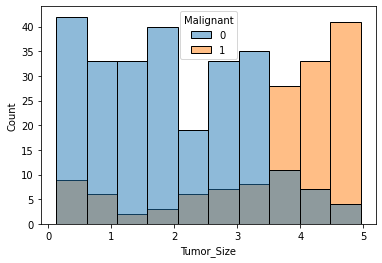

In [7]:
sns.histplot(data=df, x='Tumor_Size', hue='Malignant', kde=False)

There are much more patients with malignant = 1 when tumor size is high.

In [8]:
X = df[['Tumor_Size']]
y = df['Malignant']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

In [9]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [10]:
model.predict(X_val)

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0], dtype=int64)

Previously, we used the `predict` method to obtain the predicted class directly. However, most classifiers, including logistic regression, initially return the probability of an instance belonging to the positive class. By applying a threshold (commonly 0.5), the instance is then classified into the corresponding class. Let's retrieve the predicted probability of the positive class using the `predict_proba` method.

In [11]:
y_pred = model.predict_proba(X_val)[:, 1]

In [12]:
y_pred

array([0.06814975, 0.80037182, 0.84708723, 0.380994  , 0.39736549,
       0.14296916, 0.1054425 , 0.67589521, 0.5814911 , 0.7297419 ,
       0.59618918, 0.50846796, 0.04686187, 0.03023209, 0.05518571,
       0.03524178, 0.5880923 , 0.75782778, 0.32334269, 0.71371725,
       0.04344303, 0.07646429, 0.22569933, 0.72110037, 0.19126001,
       0.77120755, 0.49489984, 0.10352035, 0.06126859, 0.81533407,
       0.83374328, 0.4944849 , 0.87413168, 0.08148669, 0.41808322,
       0.71393167, 0.71889409, 0.07260074, 0.10032783, 0.10755934,
       0.58111879, 0.82687142, 0.67625978, 0.69274688, 0.15689879,
       0.48877774, 0.03857541, 0.05338399, 0.13075676, 0.094939  ,
       0.14346018, 0.60478229, 0.2901313 , 0.6774301 , 0.04279598,
       0.25321082, 0.18553067, 0.33480572, 0.45949029, 0.06280567,
       0.09562032, 0.0572823 , 0.39149505, 0.17797767, 0.49902712,
       0.07161694, 0.52958229, 0.17880294, 0.16422883, 0.72696788,
       0.38163248, 0.85648593, 0.06649025, 0.53481631, 0.65094

Now, we can visualize the predicted probability as a function of tumor size by obtaining model probabilities across the entire range of tumor sizes in our data (from 0 to 5).

In [13]:
tumor_size_range = np.linspace(0, 5, 200)
tumor_size_range = tumor_size_range.reshape(-1, 1)
predicted_probabilities = model.predict_proba(tumor_size_range)[:, 1]

C:\Users\dimat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


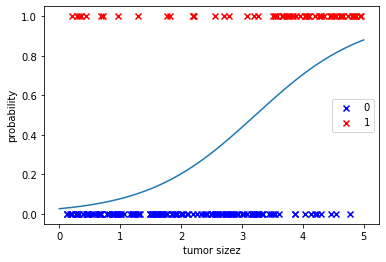

In [14]:
plt.plot(tumor_size_range, predicted_probabilities)

plt.scatter(X_val[y_val == 0], y_val[y_val == 0], color='blue', label='0', marker='x')
plt.scatter(X_val[y_val == 1], y_val[y_val == 1], color='red', label='1', marker='x')
plt.xlabel("tumor sizez")
plt.ylabel("probability")
plt.legend()
plt.show()

We’ve also plotted the instances from the negative class (y=0) in blue and the positive class (y=1) in red. It’s evident that lower tumor sizes correspond to more points in the negative class (y=0). The model successfully captures this relationship, with predicted probability increasing as tumor size grows.

### Accuracy<a id="accuracy">

Accuracy measures the rate of correct classifications. To obtain our classifications, we compare `y_pred` (the predicted probability) to a chosen threshold. Let’s start by setting the threshold at 0.5. For instances where `y_pred >= 0.5`, the prediction is classified as positive; otherwise, it’s classified as negative.

In [15]:
(y_pred >= 0.5)

array([False,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True,  True, False,  True, False, False,  True,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False,  True,  True, False, False,
        True,  True, False, False, False, False,  True, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False,

To calculate accuracy, we compare `y_val` (the actual classes) with our predictions (`y_pred >= 0.5`), where `True` corresponds to class 1 and `False` to class 0. The accuracy is then obtained by averaging these matches.

In [16]:
np.mean(y_val == (y_pred >= 0.5))

0.8

We can use the `accuracy_score` function from `sklearn`, which takes the actual classes (target) and predicted classes as input to compute accuracy.

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, (y_pred >= 0.5))

0.8

A 0.5 threshold isn’t always necessary for classification; the optimal threshold depends on the specific problem we’re addressing. Sometimes, a lower or higher threshold can yield better results. In our case, a lower threshold would result in more patients being classified as malignant, potentially reducing the risk of missing true malignant cases.

Let's view how the accuracy score changes depending on the threshold chosen for classification.

Text(0, 0.5, 'Accuracy')

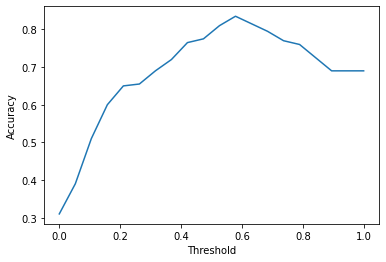

In [18]:
from sklearn.metrics import accuracy_score
thresholds = np.linspace(0, 1, 20)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    scores.append(score)
    
plt.plot(thresholds, scores)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")

The highest accuracy score occurs when the threshold is close to 0.6. If we set the threshold to 1 (classifying all patients as non-malignant), we still achieve a relatively high accuracy of 0.7. This is because our dataset is imbalanced, with more non-malignant cases than malignant ones. Accuracy is generally not recommended for imbalanced datasets, as it can be misleading, often failing to reflect the model's performance on the minority class.

### Precision and Recall<a id="pr">

In classification, predictions fall into four categories:

- **True Positives (TP):** Instances that belong to the positive class and are correctly predicted as positive.
- **True Negatives (TN):** Instances that belong to the negative class and are correctly predicted as negative.
- **False Positives (FP):** Instances that belong to the negative class but are incorrectly predicted as positive.
- **False Negatives (FN):** Instances that belong to the positive class but are incorrectly predicted as negative.

Let's count how many cases of each we have when using a threshold of 0.5 for classification.

In [19]:
actual_pos = (y_val == 1)
actual_neg = (y_val == 0)

pred_pos = (y_pred >= 0.5)
pred_neg = (y_pred < 0.5)

tp = (actual_pos & pred_pos).sum()
tn = (actual_neg & pred_neg).sum()
fp = (actual_neg & pred_pos).sum()
fn = (actual_pos & pred_neg).sum()

**Recall** is a metric that indicates the proportion of positive class instances correctly identified by the model. It is calculated as: 

$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$

**Precision** measures the accuracy of positive predictions, showing the proportion of instances predicted as positive that are actually positive. It is calculated as:

$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$

The value of these metrics can be between 0 and 1.

The goal in classification is to maximize both **precision** and **recall**. However, there is often a trade-off: as precision increases (by predicting instances we're more confident about), recall tends to decrease, as we may miss some positive class instances by not classifying them unless we’re highly certain.

Let’s calculate precision and recall, then visualize how they vary as we adjust the classification threshold.

In [20]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)

In [21]:
recall

0.6935483870967742

In [22]:
precision

0.671875

In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
thresholds = np.linspace(0, 1, 20)

scores = []

for t in thresholds:
    recall = recall_score(y_val, y_pred >= t)
    precision = precision_score(y_val, y_pred >= t)
    scores.append((t, recall, precision))
    
scores_df = pd.DataFrame(scores, columns=['threshold', 'recall', 'precision'])
scores_df

C:\Users\dimat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dimat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dimat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,recall,precision
0,0.000000,1.000000,0.310000
1,0.052632,0.919355,0.327586
2,0.105263,0.854839,0.373239
3,0.157895,0.854839,0.427419
4,0.210526,0.822581,0.463636
5,0.263158,0.774194,0.466019
6,0.315789,0.774194,0.500000
7,0.368421,0.741935,0.534884
8,0.421053,0.725806,0.600000
9,0.473684,0.709677,0.619718


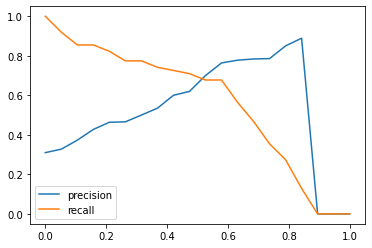

In [24]:
plt.plot(scores_df.threshold, scores_df.precision, label='precision')
plt.plot(scores_df.threshold, scores_df.recall, label='recall')

plt.legend()

As we increase the threshold to focus on predictions we’re more confident about, precision rises; however, recall decreases as we begin to miss instances that fall below this confidence level.

We can disregard the section of the chart beyond a threshold of 0.8, as there are no instances in our validation set with predicted probabilities above this point—resulting in both precision and recall values dropping to zero there.

In our case of automated medical diagnosis, achieving a high recall is crucial to avoid missing patients with malignant tumors. Missing a malignant case could lead to a lack of timely treatment, which is far more detrimental than incorrectly classifying healthy patients as malignant. False positives can still be corrected during follow-up examinations by medical experts, making high recall the priority in this context.

### F1 Score<a id="f1">

A metric that combines both precision and recall is called the **F1 score**, which is their harmonic mean. The harmonic mean is used instead of the arithmetic mean because it balances the two metrics more effectively, giving a lower score if either precision or recall is very low, which helps in cases where we want both metrics to be high.

Here's a sample custom implementation of the F1 score, which receives precision and recall as parameters.

In [25]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)

f1 = 2*precision*recall / (precision + recall)
f1

0.6825396825396826

In [26]:
def f1_score_custom(recall, precision):
    return 2*precision*recall / (precision + recall)

In [27]:
f1_score_custom(precision, recall)

0.6825396825396826

When we call this function with one argument being low, such as `recall = 0.1` and a high `precision = 0.99`, it returns an F1 score of 0.18, effectively weighting the score toward the lower value (recall). This behavior emphasizes the importance of balancing both precision and recall in the F1 metric.

In [28]:
f1_score_custom(0.1, 0.99)

0.18165137614678897

The `f1_score` function in `sklearn` accepts the true and predicted classes as arguments, allowing it to automatically calculate precision and recall before computing the F1 score.

In [29]:
from sklearn.metrics import f1_score

f1_score(y_val, (y_pred >= 0.5))

0.6825396825396826

### Confusion Matrix<a id="cm">

The **confusion matrix** is another valuable tool for assessing model behavior, offering a detailed view of true positives (TP), false negatives (FN), false positives (FP), and true negatives (TN). Let's create a confusion matrix using the computed values at a classification threshold of 0.5.

In [30]:
actual_pos = (y_val == 1)
actual_neg = (y_val == 0)

pred_pos = (y_pred >= 0.5)
pred_neg = (y_pred < 0.5)

tp = (actual_pos & pred_pos).sum()
tn = (actual_neg & pred_neg).sum()
fp = (actual_neg & pred_pos).sum()
fn = (actual_pos & pred_neg).sum()

In [31]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[117,  21],
       [ 19,  43]], dtype=int64)

Usually we would not compute the numbers ourselves, but use the `sklearn` implementation to save time; we only need to provide the actual and predicted classes from our dataset as arguments.

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, (y_pred >= 0.5))

array([[117,  21],
       [ 19,  43]], dtype=int64)

By setting `normalize='true'`, we obtain the normalized values in the confusion matrix, giving us proportion for each class in the confusion matrix.

In [33]:
confusion_matrix(y_val, (y_pred >= 0.5), normalize='true')

array([[0.84782609, 0.15217391],
       [0.30645161, 0.69354839]])

### ROC - AUC<a id="ra">

The **ROC (Receiver Operating Characteristic) curve** is a tool for evaluating model performance, showing the trade-off between two key metrics: the true positive rate (TPR) and the false positive rate (FPR). 

- **True Positive Rate (TPR)** represents the proportion of positive class instances correctly identified:
  
  $\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}$


- **False Positive Rate (FPR)** represents the proportion of negative class instances incorrectly classified as positive:

  $\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}$
  

The ROC curve plots TPR against FPR across various classification thresholds, providing insight into model sensitivity and the rate of false alarms.

Let’s begin by calculating the True Positive Rate (TPR) and False Positive Rate (FPR). We’ll then compute these values across the full range of classification thresholds to analyze model performance.

In [34]:
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

tpr, fpr

(0.6935483870967742, 0.15217391304347827)

In [35]:
from sklearn.metrics import accuracy_score
thresholds = np.linspace(0, 1, 20)

scores = []

for t in thresholds:
    pred_pos = (y_pred >= t)
    pred_neg = (y_pred < t)

    tp = (actual_pos & pred_pos).sum()
    tn = (actual_neg & pred_neg).sum()
    fp = (actual_neg & pred_pos).sum()
    fn = (actual_pos & pred_neg).sum()
                
    scores.append((t, tp, tn, fp, fn))
    
scores_df = pd.DataFrame(scores, columns=['threshold', 'tp', 'tn', 'fp', 'fn'])

scores_df['tpr'] = scores_df['tp'] / (scores_df['tp'] + scores_df['fn'])
scores_df['fpr'] = scores_df['fp'] / (scores_df['fp'] + scores_df['tn'])

Now we can visualize it:

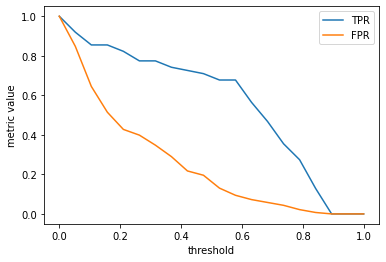

In [36]:
plt.plot(scores_df.threshold, scores_df.tpr, label='TPR')
plt.plot(scores_df.threshold, scores_df.fpr, label='FPR')
plt.xlabel('threshold')
plt.ylabel('metric value')
plt.legend()

By reversing the chart to plot the False Positive Rate (FPR) against the True Positive Rate (TPR), we obtain the ROC curve.

Text(0.5, 1.0, 'ROC Curve')

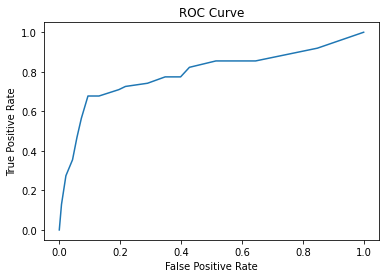

In [37]:
plt.plot(scores_df['fpr'], scores_df['tpr'])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

It’s challenging to assess our model’s performance without a baseline for comparison. Let’s create the same chart for a random model (which predicts 0 or 1 randomly) to provide a reference point.

In [38]:
y_rand = np.random.uniform(0, 1, size=len(y_val))

Text(0, 0.5, 'True Positive Rate')

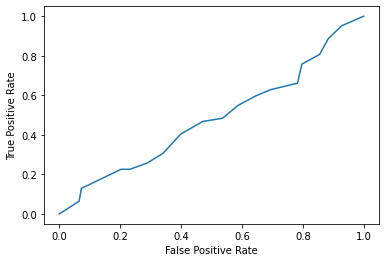

In [39]:
from sklearn.metrics import accuracy_score
thresholds = np.linspace(0, 1, 20)

scores = []

for t in thresholds:
    pred_pos = (y_rand >= t)
    pred_neg = (y_rand < t)

    tp = (actual_pos & pred_pos).sum()
    tn = (actual_neg & pred_neg).sum()
    fp = (actual_neg & pred_pos).sum()
    fn = (actual_pos & pred_neg).sum()
                
    scores.append((t, tp, tn, fp, fn))
    
scores_df = pd.DataFrame(scores, columns=['threshold', 'tp', 'tn', 'fp', 'fn'])

scores_df['tpr'] = scores_df['tp'] / (scores_df['tp'] + scores_df['fn'])
scores_df['fpr'] = scores_df['fp'] / (scores_df['fp'] + scores_df['tn'])

plt.plot(scores_df['fpr'], scores_df['tpr'])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

For a random model, the ROC curve is always a diagonal line. If our model’s ROC curve lies above this line, it indicates that our model performs better than random guessing. Think of it this way: for a given False Positive Rate (FPR), we want to achieve the highest possible True Positive Rate (TPR).

A metric that condenses the ROC curve into a single value is called AUC (Area Under the Curve). It represents the area under the ROC curve, with an AUC of 0.5 corresponding to a random model and a maximum value of 1 indicating an ideal model.

sklearn provides a built-in implementation of the AUC metric for easy calculation.

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, (y_pred >= 0.5))

0.770687237026648

### Which classification metric to choose when:<a id="guide-cm">

Choosing the right classification metric depends on the specific goals of the model, the nature of the dataset, and the consequences of different types of errors. Here’s a guide to selecting appropriate metrics based on different scenarios:

1. **Accuracy**: 
   - **Use when**: The dataset is balanced, and both classes are equally important.
   - **Avoid when**: The dataset is imbalanced, as accuracy may be misleading by favoring the majority class.

2. **Precision**:
   - **Use when**: False positives are costly. For example, in spam detection, you may want high precision to minimize the chance of misclassifying legitimate emails as spam.
   - **Avoid when**: Missing positive instances (false negatives) is more critical than avoiding false positives.

3. **Recall**:
   - **Use when**: False negatives are costly. For instance, in medical diagnosis, high recall is crucial to ensure that as many positive cases as possible (e.g., malignant tumors) are identified.
   - **Avoid when**: False positives are more detrimental than false negatives.

4. **F1 Score**:
   - **Use when**: You need a balance between precision and recall, especially in cases where both false positives and false negatives are significant. The F1 score is useful when the dataset is imbalanced and neither precision nor recall alone is sufficient.
   - **Avoid when**: The dataset is balanced, and there’s no need to balance between precision and recall. In such cases, accuracy may be a simpler and more interpretable metric.

6. **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)**:
   - **Use when**: You need to evaluate the trade-off between the true positive rate and false positive rate across various thresholds. ROC-AUC is especially useful when comparing the performance of multiple models.
   - **Avoid when**: The dataset is highly imbalanced.
   
Selecting the right metric ensures that the model evaluation aligns with the goals of the application, helping you make informed decisions about model performance and any required adjustments.

## Regression Metrics<a id="regression">

In regression, instead of classifying the instance, we need to predict a continous value.
Let’s load the house prices dataset we worked with previously. As you may recall, our task is to predict the sale price of a house based on multiple features.

In [41]:
df = pd.read_csv('data/house_prices_multiple_features.csv')

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()), 
    ('scaler', StandardScaler()) 
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories=[['Fa', 'TA', 'Gd', 'Ex']])) 
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, ['OverallQual', 'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'YearBuilt']),  
    ('cat', categorical_transformer, ['KitchenQual'])  
])

In [43]:
X_train, X_val, y_train, y_val = train_test_split(df.drop(columns='SalePrice'), df['SalePrice'], random_state=0, test_size=0.3)

In [44]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_transformed, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_val_transformed)

### MSE<a id="mse">

The Mean Squared Error (MSE) metric calculates the average of the squared differences between actual values and predicted values. It is computed as follows:

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

where $y_i$ represents the actual values, $\hat{y}_i$ the predicted values, and $n$ is the total number of observations.

Below you can find a custom implementation:

In [47]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [48]:
mse(y_val, y_pred)

1840279553.2686558

Interpreting MSE can be challenging because it squares all errors, making them less intuitive to understand. An alternative metric, the Root Mean Squared Error (RMSE), normalizes the result by taking the square root of the average of squared differences.

### RMSE<a id="rmse">


RMSE is calculated as follows:

$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$


where $y_i$ represents the actual values, $\hat{y}_i$ the predicted values, and $n$ is the total number of observations. RMSE is in the same unit as the target variable, making it easier to interpret.

In [49]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))


In [50]:
rmse(y_val, y_pred)

42898.47961488444

RMSE on the validation set for predicting house price is 42898.48. Based on this, we can understand that, on average, our model's predictions differ from the actual house prices by approximately $42,898.

### MAE<a id="mae">

MAE is another metric for regression tasks; it computes the mean absolute error. The formula is:

$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} | \hat{y}_i - y_i |$

where $\hat{y}_i$ represents the predicted values, $y_i$ the actual values, and $n$ the number of observations.

Compared to RMSE, MAE is more robust to outliers because it calculates the average of absolute errors rather than squaring them. This way, large errors don’t get amplified, making MAE less sensitive to individual large deviations and providing a better estimate of typical error in cases where outliers are present.

In [51]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true-y_pred))

In [52]:
mae(y_val, y_pred)

25799.878436840398

### MAPE<a id="mape">

MAPE (Mean Absolute Percentage Error) is a regression metric that calculates the average absolute percentage difference between predicted and actual values, providing a measure of prediction accuracy in percentage terms. The formula is:

$\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100$

where $\hat{y}_i$ represents the predicted values, $y_i$ the actual values, and $n$ the number of observations.

**Advantages:**
- **Interpretability**: Since MAPE expresses error as a percentage, it is easy to interpret, making it intuitive for stakeholders to understand model accuracy.
- **Scale Independence**: MAPE is not affected by the scale of data, allowing comparisons across different datasets or variables.

**Disadvantages:**
- **Division by Zero**: If actual values $y_i$ include zero, MAPE becomes undefined or skewed, which can lead to misleading results.
- **Sensitivity to Small Values**: When actual values are very close to zero, even small prediction errors cause large percentage errors, potentially inflating the MAPE. This makes it less reliable for datasets with values near zero.

In [53]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred) / y_true)) * 100

In [54]:
mape(y_val, y_pred) # result in percentages

15.103872594333199

### R squared<a id="r2">

R², or the coefficient of determination, is another regression metric that measures how well your model explains the variance in the target variable compared to a baseline of simply using the average (mean) prediction. An R² value of 1 means the model perfectly explains the variance, while an R² of 0 means it performs no better than predicting the mean of the target values.

It’s computed using the formula:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

where:
- $y_i$ are the actual values,
- $\hat{y}_i$ are the predicted values,
- $\bar{y}$ is the mean of the actual values, and
- $n$ is the number of observations.

In essence, R² compares your model’s predictions to the average prediction (mean of actual values), showing how much better (or worse) your model performs relative to this baseline. A negative R² indicates that the model performs worse than the mean prediction.

In [55]:
def r2_score(y_true, y_pred):
    total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
    residual_variance = np.sum((y_true - y_pred) ** 2)
    return 1 - (residual_variance / total_variance)

In [56]:
r2_score(y_val, y_pred)

0.7289318200985097

Here’s how you can use these regression metric implementations from `sklearn`:



In [57]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape, r2_score as r2
import numpy as np

# Assuming y_val and y_pred are your actual and predicted values
mse_value = mse(y_val, y_pred)
rmse_value = np.sqrt(mse_value)  # RMSE is the square root of MSE
mae_value = mae(y_val, y_pred)
mape_value = mape(y_val, y_pred)
r2_value = r2(y_val, y_pred)

print(f"MSE: {mse_value}")
print(f"RMSE: {rmse_value}")
print(f"MAE: {mae_value}")
print(f"MAPE: {mape_value}")
print(f"R-squared: {r2_value}")

MSE: 1840279553.2686565
RMSE: 42898.47961488445
MAE: 25799.878436840398
MAPE: 0.15103872594333204
R-squared: 0.7289318200985097


### Advantages/Disadvantages:<a id="reg-other">

$MSE$ (Mean Squared Error) is commonly used in model training because it is mathematically simple and works well with gradient-based optimization. By squaring the errors, it places more emphasis on larger discrepancies, making it highly sensitive to outliers. This can skew the metric when the dataset includes extreme values. Additionally, MSE leaves the result in squared units, which can make interpretation less intuitive.

$RMSE$ (Root Mean Squared Error) is the square root of MSE, converting the error metric back to the original units of the target variable. This makes RMSE easier to interpret compared to MSE and retains the property of emphasizing larger errors, but in the same units as the target, enhancing interpretability.

$MAE$ (Mean Absolute Error) is the average of absolute errors, presented in the same units as the target variable. It’s less sensitive to outliers than MSE or RMSE, treating all errors equally, and is useful when you want a straightforward, interpretable error metric without penalizing larger errors more heavily.

$MAPE$ (Mean Absolute Percentage Error) expresses errors as a percentage of actual values, making it suitable for business and financial contexts where relative accuracy is key. However, it can inflate errors with small or zero values, so it’s best for datasets with consistently positive values.

$R^2$ (R-squared) measures the proportion of variance in the target variable explained by the model, comparing model predictions to the mean of the target variable. An $R^2$ of 1 indicates a perfect fit, while 0 suggests the model performs no better than the mean. This metric provides insight into the model’s explanatory power rather than direct error measurement. $R^2$ can be misleading in the presence of overfitting or if the relationship is nonlinear.

In practice, a combination of these metrics is often used to gain a comprehensive view of model performance.

## Model Validation<a id="validation">

Let's load the CreditScoring dataset from a previous lecture. Our goal is to predict a client's status—specifically, whether they defaulted or not on their credit.

In [58]:
df = pd.read_csv('data/CreditScoring_final.csv')
df = df[df.status.notna()]

In [59]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,5,owner,18,29,married,0,fixed,45,142,6000,3000,450,1678
1,ok,12,owner,36,56,married,0,fixed,75,205,5500,1950,275,300
2,ok,2,parents,36,19,married,0,fixed,35,162,4000,100,400,570
3,ok,10,owner,48,50,married,0,freelance,45,128,11500,0,500,1195
4,ok,2,parents,36,34,married,0,fixed,60,400,9800,0,900,1316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,ok,20,other,60,39,married,0,fixed,60,119,0,0,1300,1639
3114,default,2,priv,60,53,married,0,fixed,75,85,7000,0,1050,1172
3115,ok,8,owner,48,52,married,0,fixed,60,105,3500,0,1000,1887
3116,ok,2,owner,36,30,married,0,fixed,45,350,4000,0,800,1800


Previously, we split our data into only training and validation sets. In this approach, as we adjust model parameters to improve the validation score, we risk gradually overfitting the validation set. This means our predictions become overly optimistic, as the model adapts specifically to perform well on the validation data. 

To mitigate this, it's recommended to split the data into three parts: a training set, a validation set, and a test set.

- The **training set** is used to train the model.
- The **validation set** is used for tuning model parameters and selecting optimal data transformations.
- The **test set** is reserved solely for evaluating the model's final accuracy, ensuring an unbiased performance estimate.

We can achieve this split by calling `train_test_split` twice. A common proportion is to allocate 60% of the data to the training set, 20% to the validation set, and 20% to the test set.

First, we call `train_test_split` with a test ratio of 0.2 to separate the data into a combined `train_val` set and a test set. Then, we call `train_test_split` again on the `train_val` set with a ratio of 0.25. Since 0.25 of the remaining 80% is 20% of the original data, this effectively splits the dataset into 60% training, 20% validation, and 20% test.

In [60]:
X = df.drop(columns='status')
y = df['status']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1)

After splitting, we train the model on training set and tune the params on validation set.

In [61]:
X_train.shape, X_val.shape, X_test.shape

((1869, 13), (624, 13), (624, 13))

In [62]:
class_mapping = {'ok': 0, 'default': 1}

y_train = y_train.map(class_mapping)
y_val = y_val.map(class_mapping)
y_test = y_test.map(class_mapping)
y_train_val = y_train_val.map(class_mapping)

In [63]:
categorical_cols = ['home', 'marital', 'job']
numerical_cols = ['seniority', 'time', 'age', 'records', 'expenses', 'income', 'assets', 'debt', 'amount', 'price']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  
        ]), numerical_cols),
        
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  
            ('encoder', OrdinalEncoder())
        ]), categorical_cols)
    ])

In [64]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)
X_train_val_transformed = preprocessor.transform(X_train_val)

In [65]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', max_depth=1, random_state=0)
model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_val_transformed)

f1_score(y_val, y_pred)

0.636144578313253

In [66]:
## --- here we would tune model params ---

After identifying the optimal parameters using the validation set, we call `predict` on the test set to obtain a final accuracy estimate. This final estimate will be used to report the model's performance.

In [67]:
y_pred = model.predict(X_test_transformed)

In [68]:
f1_score(y_test, y_pred)

0.6071428571428571

Accuracy on the test set is usually slightly lower than on the validation set because the model is often fine-tuned to perform well on the validation set, leading to some level of overfitting. The test set, being entirely unseen during parameter tuning, provides a more realistic measure of how the model generalizes to new data.

### Cross-Validation

Cross-validation offers a more robust approach to validating the model and finding the optimal parameters. Instead of using a single portion of the data for validation (e.g., 20%), we utilize the entire `train_val` set by dividing it into *n* equal parts, or "folds." In each iteration, one fold is used for validation while the remaining folds are used for training. This process results in training *n* models, each evaluated on a unique validation fold. The final validation score is then calculated by averaging the scores from each fold, providing a more reliable measure of model performance.

<img src="images/cross_validation.PNG" style="float: left; margin-right: 10px; width: 500px" />


This diagram illustrates k-fold cross-validation with a train-test split:

1. **Initial Split**: The full dataset is split into a training set and a separate test set.

2. **k-Fold Cross-Validation**: The training set is divided into *k* equal folds (here, 5). In each round, one fold is used for validation, and the other *k-1* folds are used for training. This process repeats until every fold has been the validation set once.

3. **Average Validation Score**: The model’s validation performance is averaged across all *k* folds, providing a robust measure of performance.

4. **Final Test Evaluation**: After selecting optimal parameters, the model is retrained on the entire training set and evaluated on the test set for an unbiased accuracy estimate. 

This method reduces overfitting and ensures a more reliable assessment.

Cross validation is particularly recommended when our dataset is not large.

In [69]:
from sklearn.model_selection import KFold

In [70]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

train_idx, val_idx = next(kfold.split(X_train_val_transformed, y_train_val))

In [71]:
len(train_idx), len(val_idx)

(1994, 499)

In [72]:
scores = []

for train_idx, val_idx in kfold.split(X_train_val_transformed, y_train_val):
    X_train_curr = X_train_val_transformed[train_idx]
    X_val_curr = X_train_val_transformed[val_idx]
    
    y_train_curr = y_train_val.iloc[train_idx]
    y_val_curr = y_train_val.iloc[val_idx]
    
    model = RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=0)
    model.fit(X_train_curr, y_train_curr)
    
    y_pred = model.predict(X_val_curr)
    f1 = f1_score(y_val_curr, y_pred)
    
    scores.append(f1)

In [73]:
scores

[0.6191950464396284,
 0.6229508196721312,
 0.6230529595015577,
 0.6455696202531644,
 0.6761363636363636]

In [74]:
np.mean(scores), np.std(scores)

(0.637380961900569, 0.021509455911063215)

We can achieve the same result using the `cross_val_score` function directly. It takes the model, the training-validation dataset, the number of folds, and the scoring function, returning the validation score for each fold automatically.

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer

f1_scorer = make_scorer(f1_score)

scores = cross_val_score(model, X_train_val_transformed, y_train_val, cv=5, scoring=f1_scorer)

In [76]:
scores

array([0.66049383, 0.64516129, 0.5942492 , 0.6038961 , 0.61538462])

In [77]:
np.mean(scores)

0.6238370076083498

The slight variation in scores between using KFold and cross_val_score function is due to shuffling the dataset, which results in slightly different fold compositions across each cross-validation run